# Reducing Customer Churn

**Comparing accuracy using AdaBoost, XGBoost and Logistic Regression algorithms.**

In this notebook, I'm going to create a machine learning model with a goal of reducing customer churn in a telecommunication company. 


**What is customer churn?**<br/>
Customer churn also known as customer attrition is the turnover or defection of customers. In the telecom industry, it's when a customer cancels a subscription service. 

**What features can be used to predict customer churn?**<br/>
1. Signing on duration: If the signing on duration is long or if the customer takes long to start using the service (time of benefit) then there is a high chance that the customer will cancel the subscription.<br/>
2. Usage of the service: If the usage of the service decreases over time, there is a high probability that the customer will churn.<br/>
3. Killer feature adoption: If the usage of the killer feature(main reason the customer uses the service) decreases, then the customer is likely to churn.<br/>
4. Customer service: If it takes a long time to solve a complaint, the customer satisfaction level will generally reduce and this may lead to churn.<br/>
5. Time to settle a bill/ make a payment: If the customer takes longer to settle a bill, it might mean two things. The customer is facing cashflow issues or the customer doesn't want to pay for the service. If the time it takes a customer to make a payment increases, the chances of customer churn increase.<br/>
6. Economic factors: If the customer is finding it difficult to pay, then the chances of cancelling the service increase.<br/>
7. Value of the service to the customer: If the values of the service to the customer decreases, then there is a high probability of customer churn.

**Importing the python libraries we're going to use.**

In [1]:
#import numpy as np
import pandas as pd
import seaborn as sn
import warnings

from IPython.display import display 
from matplotlib.pylab import * #importing numpu and pyplot
from sklearn.model_selection import train_test_split
from json import dumps

warnings.filterwarnings("ignore")

%matplotlib inline

**Loading the dataset.**

In [2]:
#loading the CSV dataset with pandas
try:
    data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    print("The Telco churn dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Unable to load dataset!")

The Telco churn dataset has 7043 samples with 21 features each.


**Exploring the dataset.**

In [3]:
display(data.shape)
display(data.describe())
print(data.info())

(7043, 21)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
display(data.head())
data.dtypes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Text(0.5, 1.0, 'Percentage of customers who churn.')

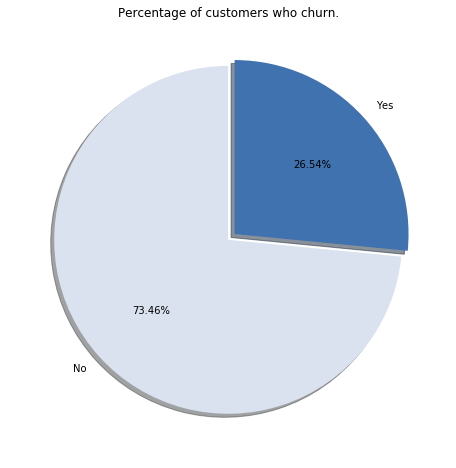

In [5]:
#Data to plot
churned_data = data['Churn'].value_counts(sort = True)
labels = churned_data.keys()
colors = ('#dbe2ef', '#3f72af')
rcParams['figure.figsize'] = 8, 8

#ploting using the Pyplot library
plt.pie(churned_data, explode = [0,0.05], shadow = True, labels = labels,  autopct='%1.2f%%', 
         colors = colors, startangle = 90,)
plt.title('Percentage of customers who churn.')

**Data preparation**

In [6]:
# check for missing values
print('Number of null values:',data.isnull().values.sum())

#Check for irrelevant columns to delete
print('Columns:', list(data.columns))

Number of null values: 0
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


There are no missing values.<br/>
The column 'customerID' is irrelevant in our quest to predict customer churn so I will delete it below.

In [7]:
data.drop(['customerID'], axis = 1, inplace = True)
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
#removing whitespaces and make text changes
data['TotalCharges'] = data['TotalCharges'].str.replace(' ', '0')
data[['OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection',
      'StreamingTV','StreamingMovies']] = data[['OnlineSecurity','OnlineBackup',
        'TechSupport','DeviceProtection','StreamingTV','StreamingMovies']].replace('No internet service', 'No')
data['MultipleLines'] = data['MultipleLines'].str.replace('No phone service', 'No')

#Changing the columns MonthlyCharges and TotalCharges values from object to numeric.
data[['MonthlyCharges','TotalCharges']] = data[['MonthlyCharges','TotalCharges']].apply(pd.to_numeric)

#replace 'No' with 0 and "Yes" with 1
binary_columns = ['Churn','PhoneService','DeviceProtection','Partner','Dependents',
                  'StreamingTV','StreamingMovies','PaperlessBilling','OnlineSecurity',
                 'OnlineBackup','TechSupport','MultipleLines']
data[binary_columns] = data[binary_columns].replace({'No':0, 'Yes': 1})
data[['DeviceProtection','StreamingTV','StreamingMovies']] = data[['DeviceProtection',
                                                'StreamingTV','StreamingMovies']].replace(np.nan,0)
data.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [9]:
# Using one-hot encoding to change categorical values to numerical values.
# pd.get_dummies(data['gender'], prefix = 'gender')
data['gender'] = pd.get_dummies(data['gender'])
data['PaymentMethod'] = pd.get_dummies(data['PaymentMethod'])
data['Contract'] = pd.get_dummies(data['Contract'])
data['InternetService'] = pd.get_dummies(data['InternetService'])

# Normalizing the tenure column
data['tenure'] = data['tenure']/(max(data['tenure']) -  min(data['tenure']))

**Splitting the data into a training and test split**

In [10]:
# initializing the features and the target variable
y = data['Churn']
X = data.drop(labels = ['Churn'], axis = 1)

In [11]:
# Using train_test_split from sklearn to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)

**Using different models**

**1. Logistic regression**

In [12]:
from sklearn.linear_model import LogisticRegression

# create the regressor and fit it
model = LogisticRegression(random_state = 18).fit(X_train, y_train)

In [13]:
y_predict = model.predict(X_test)

In [14]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

In [15]:
print(accuracy*100)

81.43100511073254


In [16]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Contract            0.829697
SeniorCitizen       0.417845
PaperlessBilling    0.343486
MultipleLines       0.115585
StreamingTV         0.077010
gender              0.046604
MonthlyCharges      0.029864
StreamingMovies     0.023021
TotalCharges       -0.000229
Partner            -0.042644
OnlineBackup       -0.157803
DeviceProtection   -0.202035
Dependents         -0.245340
PaymentMethod      -0.333300
InternetService    -0.359280
OnlineSecurity     -0.483071
TechSupport        -0.539698
tenure             -0.806561
PhoneService       -1.299294
dtype: float64

**Creating a mode using the XGBoost algorithm**

In [17]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)

In [18]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.4, learning_rate = 0.4,
                max_depth = 4, alpha = 100, n_estimators = 15, booster = 'gbtree')
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

xgb_accuracy = accuracy_score(y_test, preds)
print(xgb_accuracy*100)

81.88529244747302


**Creating a model using the AdaBoost**

In [19]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state = 18)
adaboost_classifier.fit(X_train, y_train)
ada_preds = adaboost_classifier.predict(X_test)

adb_accuracy = accuracy_score(y_test, preds)
print(adb_accuracy*100)

81.88529244747302


**Determining feature importance**

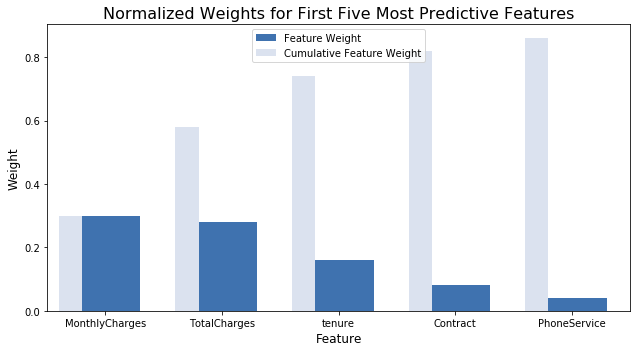

In [20]:
importances = adaboost_classifier.feature_importances_

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#3f72af', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#dbe2ef', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

feature_plot(importances, X_train, y_train)